# Lab 3

**Adam Aiken**

February 19th, 2022

In [1]:
## Part 3

# Set-up, data import, and check

import numpy as np
import pandas as pd
import datetime as dt

import matplotlib as mpl

# This lets us refer to the pyplot part of matplot lib more easily. Just use plt!
import matplotlib.pyplot as plt

# importing the style package
from matplotlib import style
from matplotlib.ticker import StrMethodFormatter


# Keeps warnings from cluttering up our notebook. 
#import warnings
#warnings.filterwarnings('ignore')

kc = pd.read_csv('https://raw.githubusercontent.com/aaiken1/fin-data-analysis-python/main/data/kc_house_data.csv',
                      index_col=0)

kc['date'] = kc['date'].str.replace('T000000','')
kc['date'] = pd.to_datetime(kc['date'], format='%Y %m %d')

kc.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21613 non-null  datetime64[ns]
 1   price          21613 non-null  float64       
 2   bedrooms       21613 non-null  int64         
 3   bathrooms      21613 non-null  float64       
 4   sqft_living    21613 non-null  int64         
 5   sqft_lot       21613 non-null  int64         
 6   floors         21613 non-null  float64       
 7   waterfront     21613 non-null  int64         
 8   view           21613 non-null  int64         
 9   condition      21613 non-null  int64         
 10  grade          21613 non-null  int64         
 11  sqft_above     21613 non-null  int64         
 12  sqft_basement  21613 non-null  int64         
 13  yr_built       21613 non-null  int64         
 14  yr_renovated   21613 non-null  int64         
 15  zipco

In [2]:
# Part 4

#kc_subset = kc[['date', 'price', 'sqft_living', 'bedrooms', 'waterfront', 'sqft_lot']]

kc_subset = kc.loc[:, ('date', 'price', 'sqft_living', 'bedrooms', 'waterfront', 'sqft_lot')]

kc_subset['year'] = kc_subset['date'].dt.year
kc_subset['prc_sq_ft'] = kc_subset['price'] / kc_subset['sqft_living']

kc_subset.sort_values(by=['prc_sq_ft'], ascending=True).head(10)


,date,price,sqft_living,bedrooms,waterfront,sqft_lot,year,prc_sq_ft
id,,,,,,,,
2891000610,2014-12-11,148900.0,1700,4,0,6000,2014,87.588235
723049156,2014-05-23,149000.0,1700,3,0,8645,2014,87.647059
5637200450,2014-10-17,257000.0,2930,5,0,10148,2014,87.713311
5111400086,2014-05-12,110000.0,1250,3,0,53143,2014,88.000000
3342700465,2015-01-23,250000.0,2840,3,0,10182,2015,88.028169
8661000089,2014-07-16,199950.0,2270,3,0,13590,2014,88.083700
4222310010,2014-12-26,152500.0,1730,4,0,7350,2014,88.150289
7686202065,2014-07-23,170000.0,1920,4,0,7500,2014,88.541667
5379804470,2014-06-17,170000.0,1920,4,0,13787,2014,88.541667


In [3]:
kc_subset['price'].min()

75000.0

In [4]:
kc_subset['price'].max()

7700000.0

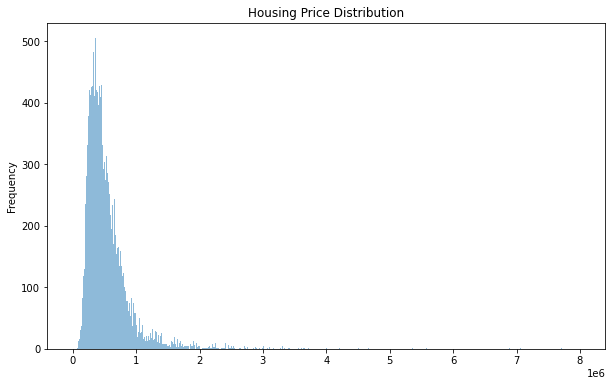

In [5]:
kc_subset.plot.hist(y = 'price', bins = 800, range =(0, 8000000), alpha = 0.5, title = 'Housing Price Distribution', figsize = (10,6), legend = False, style = 'seaborn-white')
plt.show()

<AxesSubplot:title={'center':'Housing Price Distribution'}, ylabel='Frequency'>

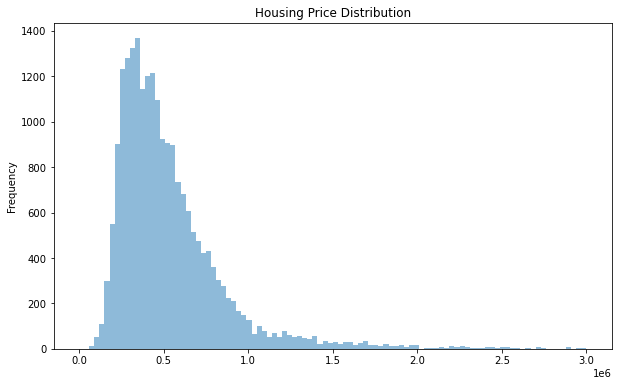

In [6]:
kc_subset[kc_subset['price'] < 3000000].plot.hist(y = 'price', bins = 100, range =(0, 3000000), alpha = 0.5, title = 'Housing Price Distribution', figsize = (10,6), legend = False, style = 'seaborn-white')

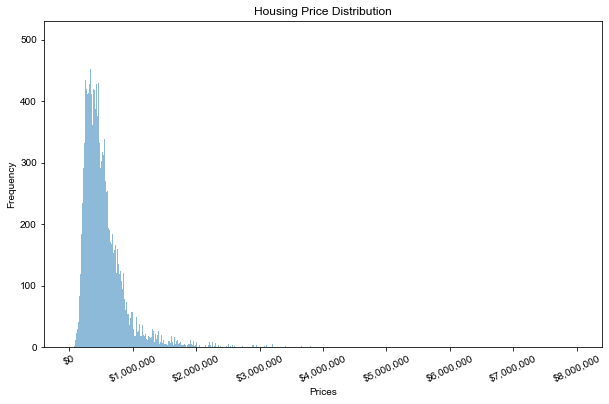

In [7]:

plt.figure(figsize=(10, 6))

plt.hist(kc_subset['price'], alpha = 0.5, bins = 800, range = (0, 8000000))
plt.xlabel('Prices')
plt.ylabel('Frequency')
plt.title('Housing Price Distribution')
plt.style.use('seaborn-white')
plt.ticklabel_format(axis='x', style='plain')
plt.tick_params(axis='x', rotation=25)
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}')); 


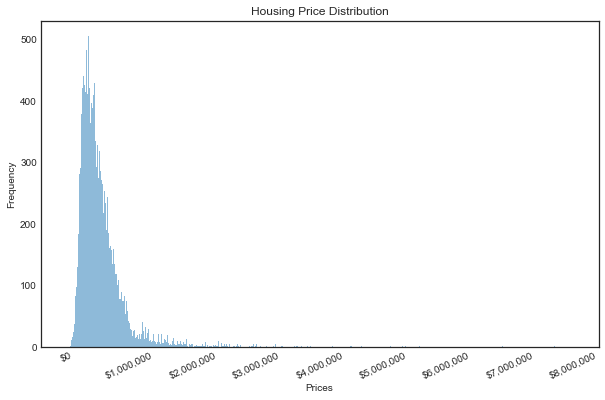

In [8]:
fig = plt.figure(figsize=(10, 6))

ax = fig.add_subplot(1, 1, 1)

ax.hist(kc_subset['price'], alpha = 0.5, bins = 800, range = (0, 8000000))

ax.set_xlabel('Prices')
ax.set_ylabel('Frequency')
ax.set_title('Housing Price Distribution')
ax.ticklabel_format(axis='x', style='plain')
ax.tick_params(axis='x', rotation=25)
ax.xaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))


In [9]:
kc_subset['large_house'] = np.where(kc_subset['sqft_living']>2500, 'yes', 'no')

kc_subset['large_house'] = kc_subset['large_house'].astype('category')


kc_subset['sqft_living_100'] = kc_subset['sqft_living'].rank(pct=True, method='min')

print(kc_subset['sqft_living_100'].min())
print(kc_subset['sqft_living_100'].max())

4.6268449544255775e-05
1.0


In [10]:
# create a list of our conditions
conditions = [
    (kc_subset['sqft_living_100'] < 0.25),
    (kc_subset['sqft_living_100'] >= 0.25) & (kc_subset['sqft_living_100'] < 0.5),
    (kc_subset['sqft_living_100'] >= 0.5) & (kc_subset['sqft_living_100'] < 0.75),
    (kc_subset['sqft_living_100'] >= 0.75)
    ]

# create a list of the values we want to assign for each condition
values = ['q1', 'q2', 'q3', 'q4']

# create a new column and use np.select to assign values to it using our lists as arguments
kc_subset['large_house_4'] = np.select(conditions, values)

kc_subset['large_house_4'] = kc_subset['large_house_4'].astype('category')


In [11]:
kc_subset['waterfront'] = kc_subset['waterfront'].astype('category')


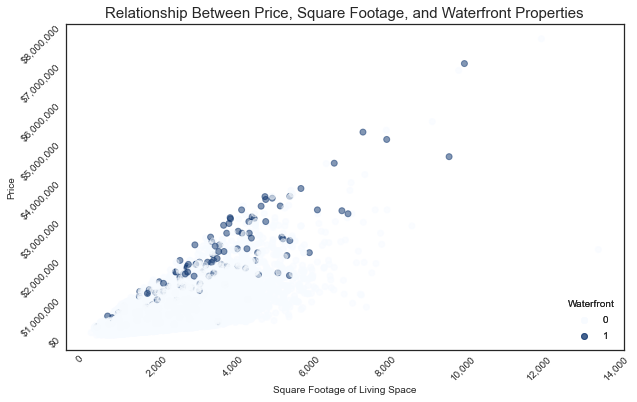

In [12]:
fig = plt.figure(figsize=(10, 6))

ax = fig.add_subplot(1, 1, 1)

scatter = ax.scatter(y=kc_subset['price'], x=kc_subset['sqft_living'], c=kc_subset['waterfront'], cmap='Blues', alpha = 0.5)

ax.set_xlabel('Square Footage of Living Space')
ax.set_ylabel('Price')
ax.set_title('Relationship Between Price, Square Footage, and Waterfront Properties', fontsize = 15)
ax.ticklabel_format(axis='x', style='plain')
ax.tick_params(axis='x', rotation=45)
ax.tick_params(axis='y', rotation=45)
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))

# produce a legend with the unique colors from the scatter
legend = ax.legend(*scatter.legend_elements(),
                    loc="lower right", title="Waterfront")
ax.add_artist(legend);


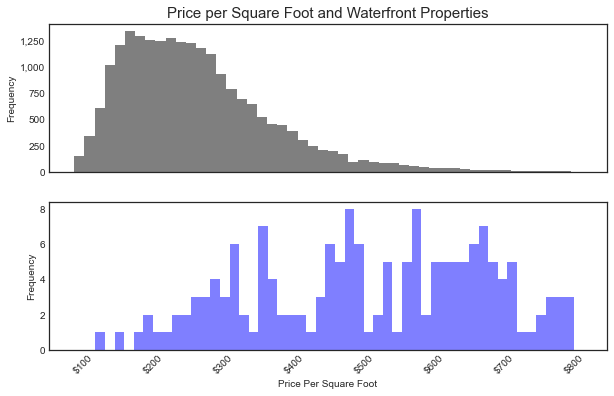

In [13]:
fig, axs = plt.subplots(2, 1, sharex=True, sharey=False, figsize=(10, 6))

no_water = kc_subset[kc_subset['waterfront'] == 0]
water = kc_subset[kc_subset['waterfront'] == 1]

axs[0].hist(no_water['prc_sq_ft'], bins=50, color='k', alpha=0.5)
axs[1].hist(water['prc_sq_ft'], bins=50, color='b', alpha=0.5)

axs[1].set_xlabel('Price Per Square Foot')

axs[0].set_ylabel('Frequency')
axs[1].set_ylabel('Frequency')

axs[0].set_title('Price per Square Foot and Waterfront Properties', fontsize = 15)

axs[1].ticklabel_format(axis='x', style='plain')

axs[1].tick_params(axis='x', rotation=45)

axs[1].xaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))

axs[0].yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
axs[1].yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'));
